<a href="https://colab.research.google.com/github/luisdiaz1997/EM_expression/blob/main/EM_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

In [206]:
 n = 6
 O = torch.ones((n, 1), requires_grad=True)

In [172]:
O

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], requires_grad=True)

In [173]:
C = torch.Tensor([123, 64, 2])[None,:]
C

tensor([[123.,  64.,   2.]])

In [174]:
A = torch.Tensor([[0, 0, 1],
              [0, 1, 0],
              [1, 0, 0],
              [1, 1, 0],
              [0, 1, 1], 
              [1, 0, 1]])
A

tensor([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 1., 0.],
        [0., 1., 1.],
        [1., 0., 1.]])

In [175]:
def log_prob(O, C, A):
  return torch.matmul(C, torch.matmul(A.T, O)) - torch.sum(torch.matmul(A.T, O))

In [176]:
J = -log_prob(O, C, A)

In [203]:
def train(O, C, A, steps=1000):
  learning_rate = 1e-3
  losses = []
  for i in tqdm(range(steps)):
    J = -log_prob(O, C, A) + (O**2).sum()
    losses.append(J[0].detach().numpy())
    J.backward()
    with torch.no_grad():
      O -= learning_rate * O.grad
      O.grad.zero_()
  return np.array(losses)

In [215]:
 O = torch.ones((n, 1), requires_grad=True)
losses=  train(O, C, A, steps=2000)

100%|██████████| 2000/2000 [00:00<00:00, 4981.67it/s]


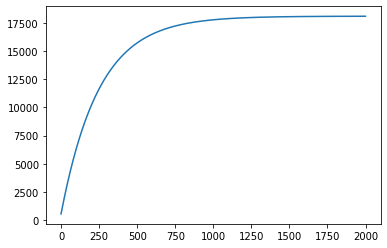

In [216]:
plt.plot(-losses)

In [219]:
def expected(O, C, A):
  return torch.matmul(O, C) * A/torch.matmul(O.T, A)

In [238]:
np.round(expected(O, C, A).sum(axis=1, keepdims=True).detach().numpy(), 1)

array([[ 0. ],
       [12.9],
       [34.9],
       [90.9],
       [13.8],
       [36.5]], dtype=float32)

In [239]:
O

tensor([[ 0.5091],
        [30.9436],
        [59.9054],
        [90.8308],
        [31.4345],
        [60.3963]], requires_grad=True)